In [1]:
import pandas as pd
filter_file= pd.read_csv('filtered_file.csv')
filter_file

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,6,29/05/2006,29/05/2016,29/05/2017,21/10/1966,10/09/1990,0,13,1,2,...,0,0,2006,87,1598,9927.00,4,P,4.250,1055
1,6,29/05/2006,29/05/2017,29/05/2018,21/10/1966,10/09/1990,0,13,1,2,...,0,0,2006,87,1598,9927.00,4,P,4.250,1055
2,6,29/05/2006,29/05/2018,29/05/2019,21/10/1966,10/09/1990,0,13,1,2,...,0,0,2006,87,1598,9927.00,4,P,4.250,1055
3,7,11/02/2015,11/02/2016,11/02/2017,14/05/1946,24/03/2000,1,3,1,1,...,0,0,2009,109,1396,16550.00,5,P,4.245,1168
4,8,28/05/2001,28/05/2016,28/05/2017,11/05/1941,01/08/1962,0,18,1,2,...,0,0,2001,130,1984,27330.00,4,P,4.547,1310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68954,53435,04/12/2017,04/12/2017,04/12/2018,12/03/1986,26/02/2016,0,2,2,2,...,0,0,2005,140,1968,28050.00,5,D,4.458,1489
68955,53441,22/11/2017,22/11/2017,22/11/2018,08/02/1964,06/05/1982,0,2,1,1,...,0,0,1991,60,1389,11575.49,5,P,4.050,995
68956,53441,22/11/2017,22/11/2018,22/11/2019,08/02/1964,06/05/1982,0,2,1,1,...,0,0,1991,60,1389,11575.49,5,P,4.050,995
68957,53442,19/06/2018,19/06/2018,19/06/2019,01/04/1969,25/03/1988,0,1,1,1,...,1,1,1999,135,1998,21239.77,5,P,4.740,1453


In [2]:
filter_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68959 entries, 0 to 68958
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    68959 non-null  int64  
 1   Date_start_contract   68959 non-null  object 
 2   Date_last_renewal     68959 non-null  object 
 3   Date_next_renewal     68959 non-null  object 
 4   Date_birth            68959 non-null  object 
 5   Date_driving_licence  68959 non-null  object 
 6   Distribution_channel  68959 non-null  int64  
 7   Seniority             68959 non-null  int64  
 8   Policies_in_force     68959 non-null  int64  
 9   Max_policies          68959 non-null  int64  
 10  Max_products          68959 non-null  int64  
 11  Lapse                 68959 non-null  int64  
 12  Date_lapse            24846 non-null  object 
 13  Payment               68959 non-null  int64  
 14  Premium               68959 non-null  float64
 15  Cost_claims_year   

Based on this the missing value mainly lies in date_lapse, type_fuel(a very few and length cuz bikes/no door vehicles dont have length)

In [3]:
target=filter_file['Cost_claims_year']
print(target.describe())
print(target.quantile([0.90,0.95,0.99]))

count     68959.000000
mean        235.048962
std        1822.256673
min           0.000000
25%           0.000000
50%           0.000000
75%          63.340000
max      260853.240000
Name: Cost_claims_year, dtype: float64
0.90     579.3480
0.95     949.1100
0.99    3832.8568
Name: Cost_claims_year, dtype: float64


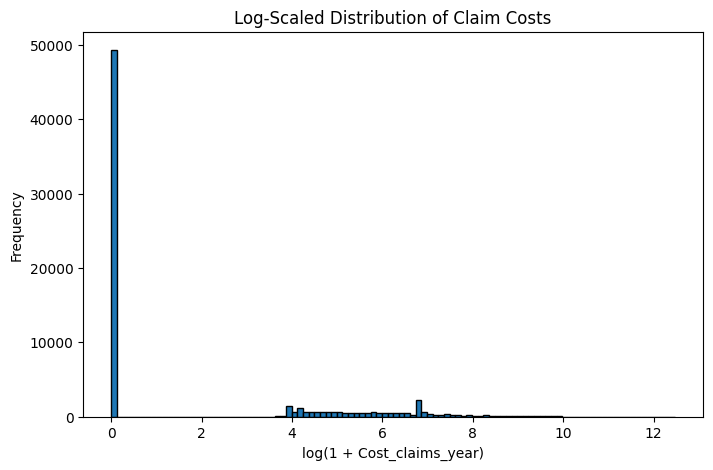

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(np.log1p(filter_file['Cost_claims_year']), bins=100, edgecolor='k')
plt.title('Log-Scaled Distribution of Claim Costs')
plt.xlabel('log(1 + Cost_claims_year)')
plt.ylabel('Frequency')
plt.show()


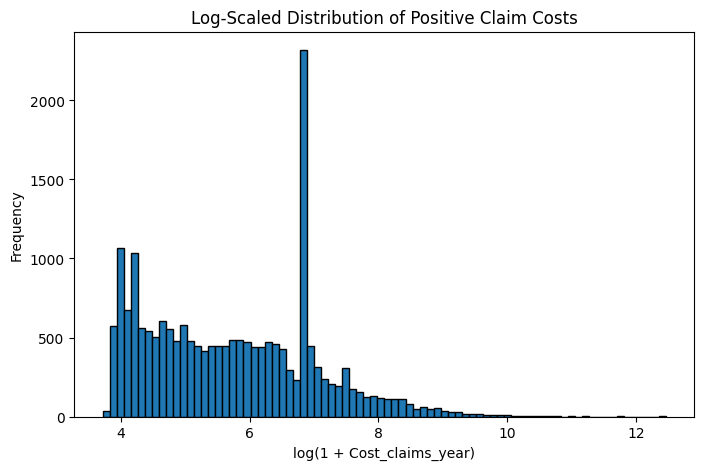

In [5]:
claims_positive = filter_file[filter_file['Cost_claims_year'] > 0]['Cost_claims_year']

plt.figure(figsize=(8,5))
plt.hist(np.log1p(claims_positive), bins=80, edgecolor='k')
plt.title('Log-Scaled Distribution of Positive Claim Costs')
plt.xlabel('log(1 + Cost_claims_year)')
plt.ylabel('Frequency')
plt.show()

In [6]:
claims_positive = filter_file[filter_file['Cost_claims_year'] > 0]['Cost_claims_year']
print("Number of non-zero claim rows:", len(claims_positive))
print("Total rows in dataset:", len(filter_file))
print("Percentage of positive claims:", len(claims_positive) / len(filter_file) * 100)

Number of non-zero claim rows: 19646
Total rows in dataset: 68959
Percentage of positive claims: 28.489392247567398


In [7]:
numeric_cols = [
    'Premium', 'Value_vehicle', 'Power', 'Cylinder_capacity',
    'Weight', 'Length', 'Seniority', 'R_Claims_history', 'N_claims_history'
]

In [8]:
subset = filter_file[numeric_cols + ['Cost_claims_year']].dropna()

In [9]:
corr_raw = subset.corr()['Cost_claims_year'].sort_values(ascending=True)
corr_log = subset.corrwith(np.log1p(subset['Cost_claims_year'])).sort_values(ascending=True)

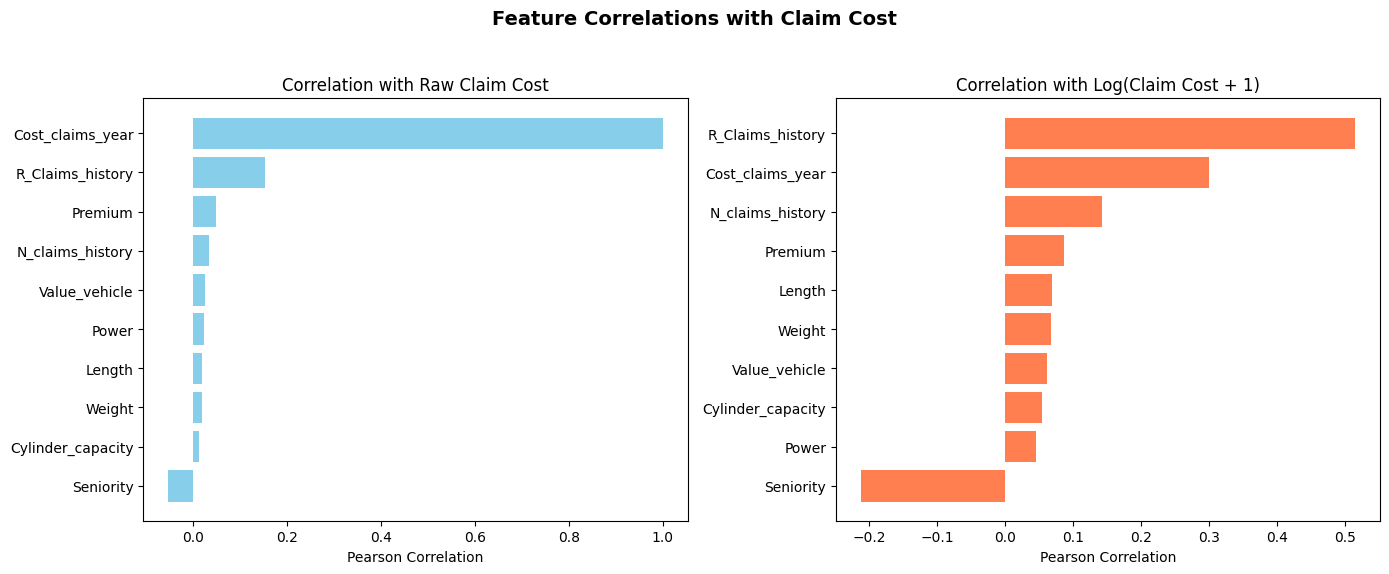

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].barh(corr_raw.index, corr_raw.values, color='skyblue')
axes[0].set_title('Correlation with Raw Claim Cost', fontsize=12)
axes[0].set_xlabel('Pearson Correlation')

axes[1].barh(corr_log.index, corr_log.values, color='coral')
axes[1].set_title('Correlation with Log(Claim Cost + 1)', fontsize=12)
axes[1].set_xlabel('Pearson Correlation')

plt.suptitle('Feature Correlations with Claim Cost', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [11]:
corr_raw_table = corr_raw.drop('Cost_claims_year', errors='ignore')
corr_log_table = corr_log.drop('Cost_claims_year', errors='ignore')

corr_summary = pd.DataFrame({
    'Correlation (Raw Target)': corr_raw_table.round(3),
    'Correlation (Log Target)': corr_log_table.round(3)
}).sort_values(by='Correlation (Log Target)', ascending=False)

print("Feature Correlations with Claim Cost")
display(corr_summary)


Feature Correlations with Claim Cost


,Correlation (Raw Target),Correlation (Log Target)
R_Claims_history,0.153,0.514
N_claims_history,0.034,0.142
Premium,0.050,0.086
Length,0.019,0.069
Weight,0.019,0.067
Value_vehicle,0.026,0.061
Cylinder_capacity,0.013,0.054
Power,0.023,0.045
Seniority,-0.054,-0.213


So now with the given correlation we are gonna be taking the features and target to do a simple linear regression

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
features = [
    'R_Claims_history', 'N_claims_history', 'Premium',
    'Value_vehicle', 'Length', 'Weight', 'Cylinder_capacity',
    'Power', 'Seniority'
]

In [14]:
X = filter_file[features].fillna(0)
y = filter_file['Cost_claims_year']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
print(f"Baseline MSE (Raw Target): {mse:.2f}")

Baseline MSE (Raw Target): 2808590.91


In [18]:
y_log = np.log1p(y)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

model_log = LinearRegression()
model_log.fit(X_train, y_train_log)

y_pred_log = model_log.predict(X_test)
mse_log = mean_squared_error(y_test_log, y_pred_log)

print(f"Baseline MSE (Log-Transformed Target): {mse_log:.4f}")

#this is log form to stabilize variance

Baseline MSE (Log-Transformed Target): 5.4614


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

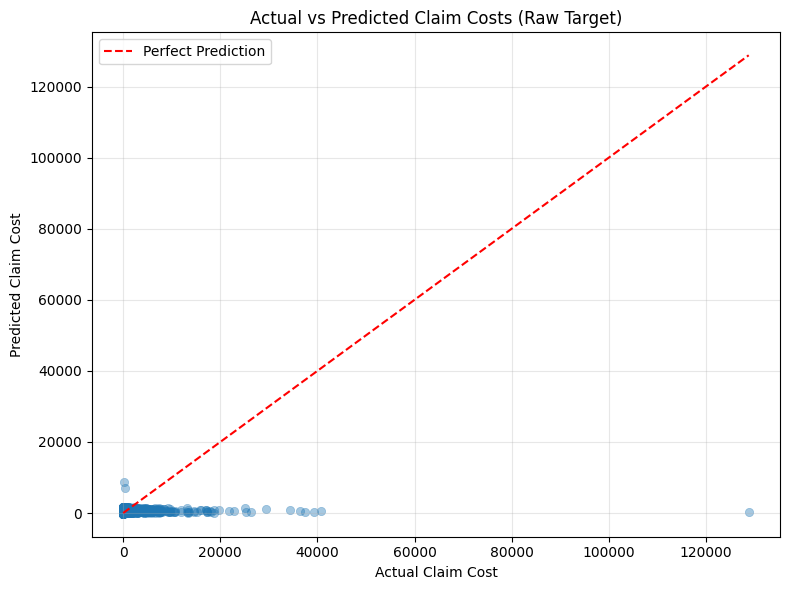

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, edgecolor=None)
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Claim Cost")
plt.ylabel("Predicted Claim Cost")
plt.title("Actual vs Predicted Claim Costs (Raw Target)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


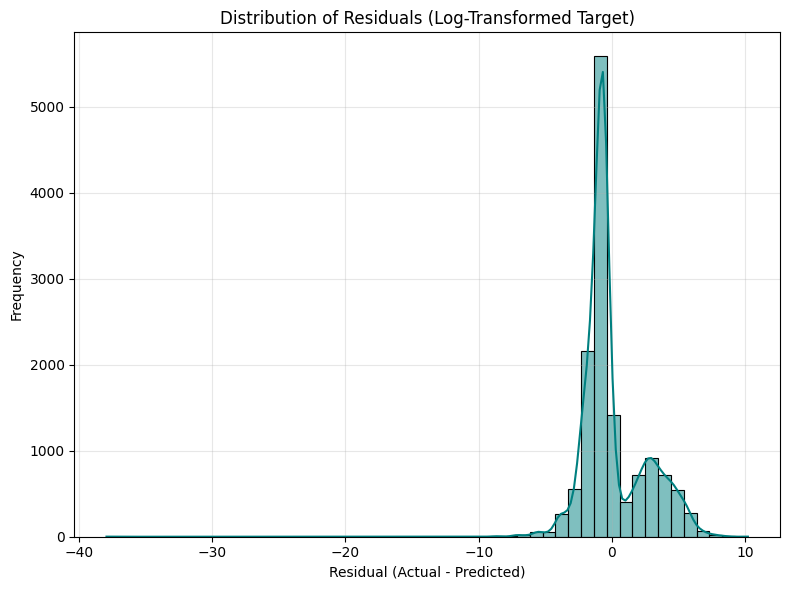

In [21]:
residuals = y_test_log - y_pred_log

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=50, kde=True, color="teal")
plt.title("Distribution of Residuals (Log-Transformed Target)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

MSE after filterning only positive claims

In [22]:
nonzero_data = filter_file[filter_file['Cost_claims_year'] > 0]
print(f"Non-zero claims: {len(nonzero_data)} records")


Non-zero claims: 19646 records


In [23]:
X_nz = nonzero_data[features].fillna(0)
y_nz = nonzero_data['Cost_claims_year']

X_train_nz, X_test_nz, y_train_nz, y_test_nz = train_test_split(X_nz, y_nz, test_size=0.2, random_state=42)


In [24]:
model_nz = LinearRegression()
model_nz.fit(X_train_nz, y_train_nz)
y_pred_nz = model_nz.predict(X_test_nz)

mse_nz = mean_squared_error(y_test_nz, y_pred_nz)
print(f"MSE (Non-Zero Claims Only): {mse_nz:.2f}")


MSE (Non-Zero Claims Only): 3809397.56


In [25]:
y_log_nz = np.log1p(y_nz)
X_train_nz, X_test_nz, y_train_log_nz, y_test_log_nz = train_test_split(X_nz, y_log_nz, test_size=0.2, random_state=42)

model_log_nz = LinearRegression()
model_log_nz.fit(X_train_nz, y_train_log_nz)
y_pred_log_nz = model_log_nz.predict(X_test_nz)

mse_log_nz = mean_squared_error(y_test_log_nz, y_pred_log_nz)
print(f"MSE (Log Target, Non-Zero Claims): {mse_log_nz:.4f}")


MSE (Log Target, Non-Zero Claims): 1.5924


In [26]:
rmse_all = mse ** 0.5
rmse_nonzero = mse_nz ** 0.5
print(rmse_all, rmse_nonzero)


1675.885112893311 1951.7678050886877


In [27]:
#now we gonna go with loss at risk function to try minimize the huge loss
import numpy as np
from sklearn.metrics import mean_squared_error

def loss_at_risk(y_true, y_pred, alpha=0.5):
    """
    Custom Loss-at-Risk (LaR) function.
    alpha controls how much extra weight to give large claims.
    """

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    w = 1 + alpha * (y_true / np.max(y_true))
    weighted_mse = np.mean(w * (y_true - y_pred) ** 2)
    return weighted_mse


In [28]:
from sklearn.linear_model import LinearRegression

model_lar = LinearRegression()
model_lar.fit(X_train, y_train)
y_pred_lar = model_lar.predict(X_test)


In [29]:
mse_raw = mean_squared_error(y_test, y_pred_lar)
lar_loss = loss_at_risk(y_test, y_pred_lar, alpha=0.5)

print(f"MSE (Baseline): {mse_raw:.2f}")
print(f"Loss-at-Risk (α=0.5): {lar_loss:.2f}")


MSE (Baseline): 2808590.91
Loss-at-Risk (α=0.5): 3540791.55


for non-zero claims loss at risk

In [30]:

nonzero = filter_file[filter_file['Cost_claims_year'] > 0]
X_nz = nonzero[features].fillna(0)
y_nz = nonzero['Cost_claims_year']
from sklearn.model_selection import train_test_split
X_train_nz, X_test_nz, y_train_nz, y_test_nz = train_test_split(
    X_nz, y_nz, test_size=0.2, random_state=42
)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_nz = LinearRegression()
model_nz.fit(X_train_nz, y_train_nz)
y_pred_nz = model_nz.predict(X_test_nz)

mse_nz = mean_squared_error(y_test_nz, y_pred_nz)


In [32]:
lar_nz = loss_at_risk(y_test_nz, y_pred_nz, alpha=0.5)

print(f"MSE (Non-Zero Claims): {mse_nz:.2f}")
print(f"Loss-at-Risk (α=0.5, Non-Zero Claims): {lar_nz:.2f}")


MSE (Non-Zero Claims): 3809397.56
Loss-at-Risk (α=0.5, Non-Zero Claims): 4591564.26
